In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'catboost_info', 'EGFR_subtypes_prediction_383cases_01_newKNN14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newKNN141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR13.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR131.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB15.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB151.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF12.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF121.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF23.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF231.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM192.ipynb', 'Embeded-FS-

In [24]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'KNN14'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/train-zscore.csv")

test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-KNN14.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-KNN14.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [25]:
test.shape

(60, 15)

In [26]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [27]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [28]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-KNN19.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CT_wavelet-LLH_firstorder_10Percentile              322 non-null    float64
 1   CT_wavelet-LHH_firstorder_Kurtosis                  322 non-null    float64
 2   CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis    322 non-null    float64
 3   PET_original_firstorder_10Percentile                322 non-null    float64
 4   CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis  322 non-null    float64
 5   CT_wavelet2-HLH_firstorder_Median                   322 non-null    float64
 6   CT_lbp-3D-k_firstorder_Kurtosis                     322 non-null    float64
 7   CT_lbp-3D-k_glcm_Correlation                        322 non-null    float64
 8   CT_wavelet-LLH_firstorder_90Percentile              322 non-null    float64
 9  

count   mean   std  \
CT_wavelet-LLH_firstorder_10Percentile             322.000 -0.000 1.002   
CT_wavelet-LHH_firstorder_Kurtosis                 322.000  0.000 1.002   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   322.000  0.000 1.002   
PET_original_firstorder_10Percentile               322.000  0.000 1.002   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis 322.000  0.000 1.002   
CT_wavelet2-HLH_firstorder_Median                  322.000 -0.000 1.002   
CT_lbp-3D-k_firstorder_Kurtosis                    322.000  0.000 1.002   
CT_lbp-3D-k_glcm_Correlation                       322.000  0.000 1.002   
CT_wavelet-LLH_firstorder_90Percentile             322.000  0.000 1.002   
CT_wavelet-LLH_firstorder_Kurtosis                 322.000  0.000 1.002   
CT_wavelet2-LLL_glcm_Correlation                   322.000  0.000 1.002   
PET_original_shape_Elongation                      322.000  0.000 1.002   
CT_wavelet-LHL_glcm_ClusterShade                   322.000 -0.000 1.002   
CT_wavelet2-HHL_firstorder_Skewness                322.000 -0.000 1.002   
label                                              322.000  0.435 0.497   

                                                       min    10%    25%  \
CT_wavelet-LLH_firstorder_10Percentile              -5.921 -1.005 -0.395   
CT_wavelet-LHH_firstorder_Kurtosis                  -1.450 -0.874 -0.665   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis    -0.843 -0.789 -0.714   
PET_original_firstorder_10Percentile                -2.041 -1.053 -0.732   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis  -0.272 -0.271 -0.270   
CT_wavelet2-HLH_firstorder_Median                   -6.709 -0.718 -0.180   
CT_lbp-3D-k_firstorder_Kurtosis                     -1.996 -0.817 -0.588   
CT_lbp-3D-k_glcm_Correlation                        -2.914 -0.870 -0.546   
CT_wavelet-LLH_firstorder_90Percentile              -1.296 -0.922 -0.602   
CT_wavelet-LLH_firstorder_Kurtosis                  -0.959 -0.628 -0.537   
CT_wavelet2-LLL_glcm_Correlation                    -5.310 -1.290 -0.364   
PET_original_shape_Elongation                       -4.235 -1.283 -0.563   
CT_wavelet-LHL_glcm_ClusterShade                    -8.923 -0.490 -0.037   
CT_wavelet2-HHL_firstorder_Skewness                -11.815 -0.471 -0.124   
label                                                0.000  0.000  0.000   

                                                      50%    75%   90%   95%  \
CT_wavelet-LLH_firstorder_10Percentile              0.153  0.663 1.023 1.221   
CT_wavelet-LHH_firstorder_Kurtosis                 -0.276  0.265 1.276 2.177   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   -0.199  0.417 0.865 1.260   
PET_original_firstorder_10Percentile               -0.168  0.547 1.089 1.765   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis -0.257 -0.148 0.290 0.821   
CT_wavelet2-HLH_firstorder_Median                  -0.010  0.156 0.516 1.078   
CT_lbp-3D-k_firstorder_Kurtosis                    -0.211  0.253 1.214 1.696   
CT_lbp-3D-k_glcm_Correlation                       -0.099  0.479 0.922 1.134   
CT_wavelet-LLH_firstorder_90Percentile             -0.254  0.312 1.073 1.881   
CT_wavelet-LLH_firstorder_Kurtosis                 -0.317  0.092 0.832 1.945   
CT_wavelet2-LLL_glcm_Correlation                    0.305  0.697 0.880 0.981   
PET_original_shape_Elongation                       0.108  0.670 1.176 1.338   
CT_wavelet-LHL_glcm_ClusterShade                    0.123  0.180 0.291 0.470   
CT_wavelet2-HHL_firstorder_Skewness                 0.079  0.259 0.586 0.884   
label                                               0.000  1.000 1.000 1.000   

                                                     99%    max  
CT_wavelet-LLH_firstorder_10Percentile             1.345  1.477  
CT_wavelet-LHH_firstorder_Kurtosis                 4.012  5.213  
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   4.506  5.157  
PET_original_firstorder_10Percentile               3.028  5.535  
CT_wavelet-LHL_glszm_Lar

In [29]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LLH_firstorder_10Percentile                0
CT_wavelet-LHH_firstorder_Kurtosis                    0
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis      0
PET_original_firstorder_10Percentile                  0
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis    0
CT_wavelet2-HLH_firstorder_Median                     0
CT_lbp-3D-k_firstorder_Kurtosis                       0
CT_lbp-3D-k_glcm_Correlation                          0
CT_wavelet-LLH_firstorder_90Percentile                0
CT_wavelet-LLH_firstorder_Kurtosis                    0
CT_wavelet2-LLL_glcm_Correlation                      0
PET_original_shape_Elongation                         0
CT_wavelet-LHL_glcm_ClusterShade                      0
CT_wavelet2-HHL_firstorder_Skewness                   0
label                                                 0
dtype: int64

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

In [23]:
evaluate_classification_model_holdout(base_models)



################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.602500
Naive Bayes: 0.452500
KNN: 0.592500
SVM: 0.640000
ANN: 0.605000
CART: 0.550000
BaggedTrees: 0.572500
RF: 0.677500
AdaBoost: 0.577500
GBM: 0.627500
XGBoost: 0.662500
LightGBM: 0.650000
CatBoost: 0.655000
NGBoost: 0.660000

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.615          0.603
1          Naive Bayes           0.565          0.453
2                  KNN           0.701          0.593
3                  SVM           0.730          0.640
4                  ANN           0.828          0.605
5                 CART           1.000          0.550
6          BaggedTrees           0.976          0.573
7                   RF           1.000          0.677
8             AdaBoost           0.881          0.578
9                  GBM           1.000          0.628
10

In [23]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [25]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.6025

In [26]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-LR73', Save_format = 'csv',Save_type = 'col')

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.69      0.72      0.71        40
EGFR Mutated       0.52      0.48      0.50        25

    accuracy                           0.63        65
   macro avg       0.61      0.60      0.60        65
weighted avg       0.63      0.63      0.63        65

precision 0.5217391304347826 accuracy 0.6307692307692307 recall 0.48 auc 0.6025


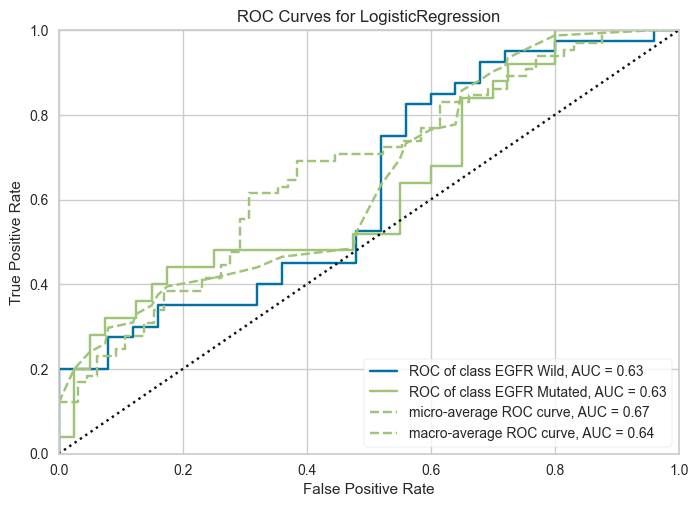

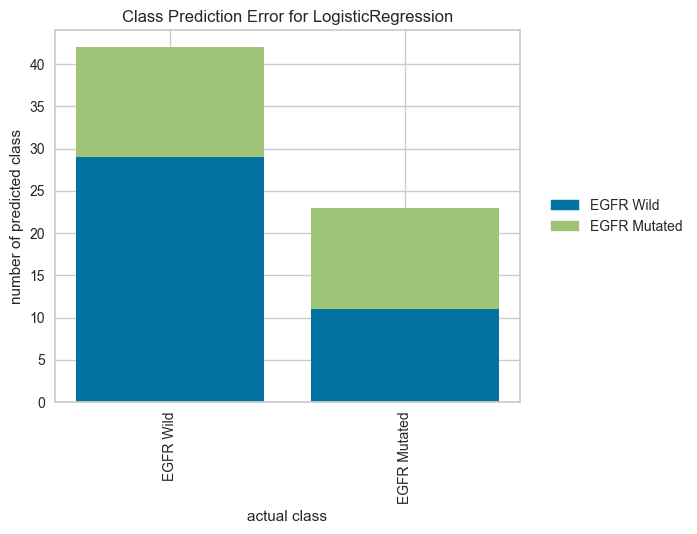

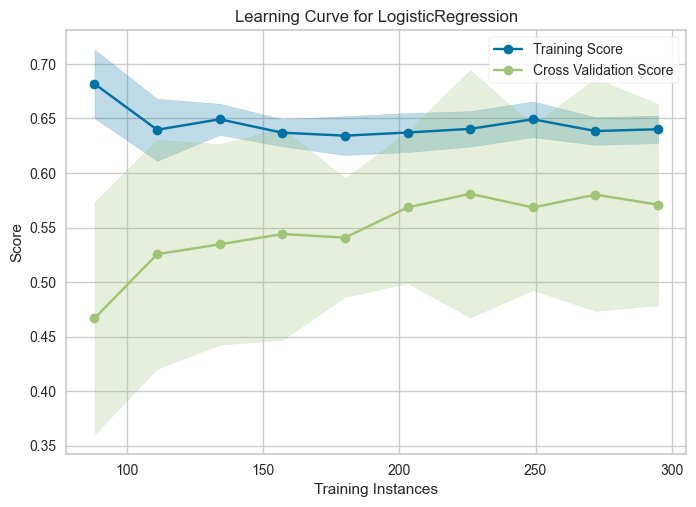

In [28]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [30]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.645

In [31]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-RF73', Save_format = 'csv',Save_type = 'col')

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.74      0.65      0.69        40
EGFR Mutated       0.53      0.64      0.58        25

    accuracy                           0.65        65
   macro avg       0.64      0.65      0.64        65
weighted avg       0.66      0.65      0.65        65

precision 0.5333333333333333 accuracy 0.6461538461538462 recall 0.64 auc 0.645


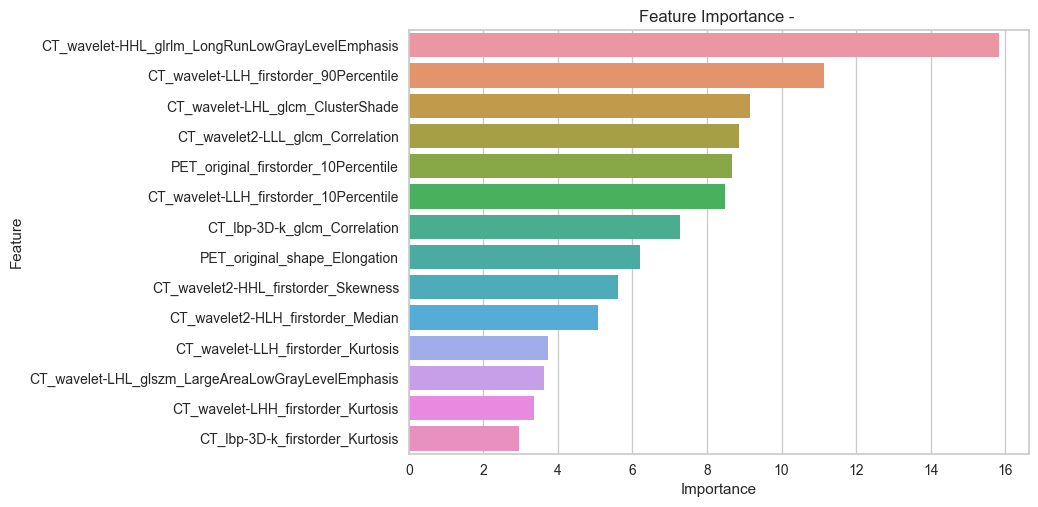

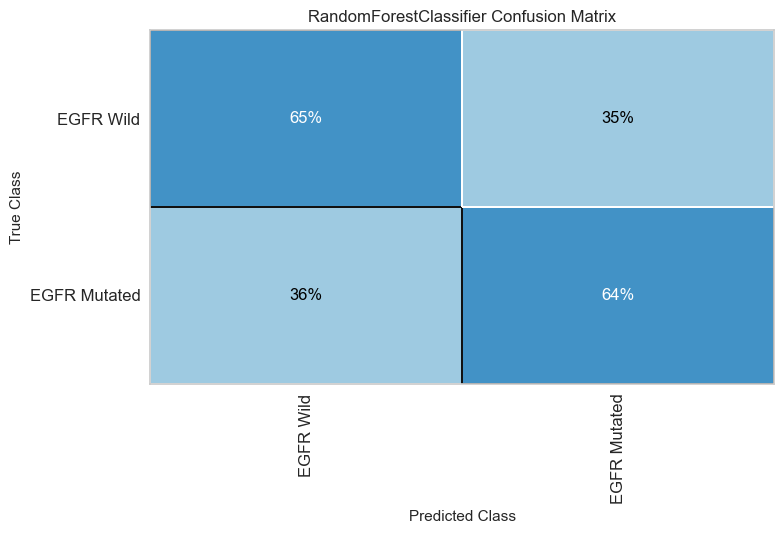

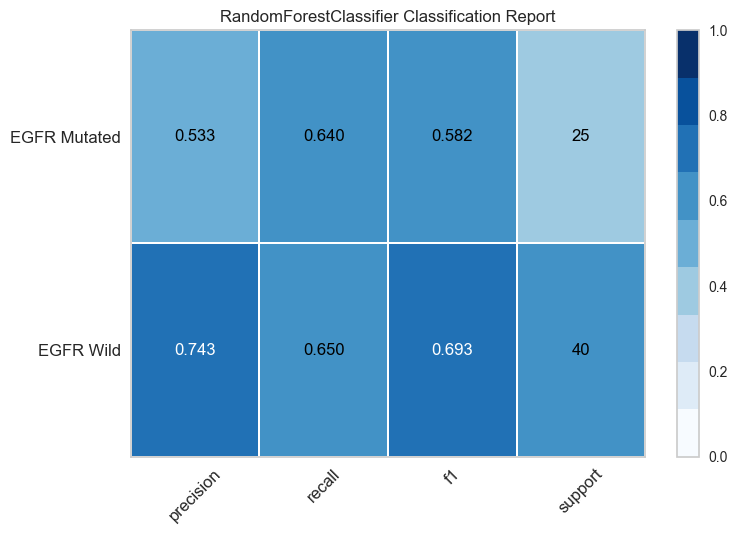

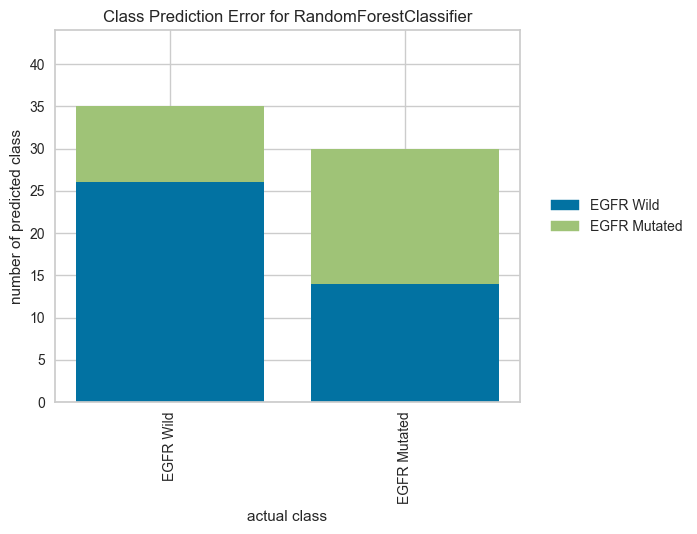

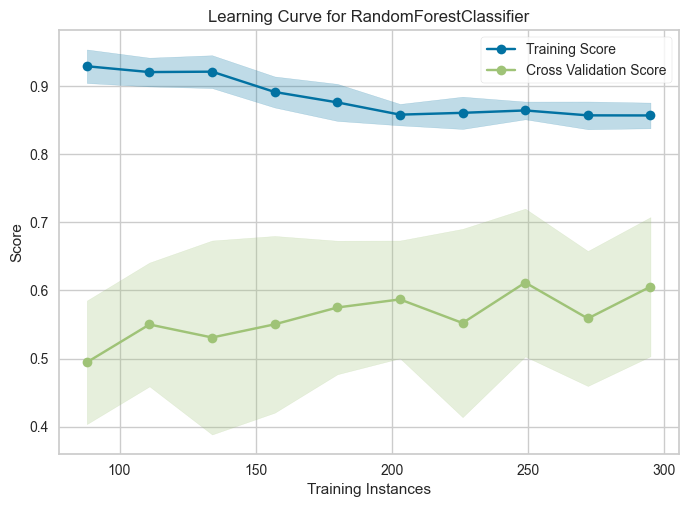

In [33]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [32]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6923360	total: 704us	remaining: 351ms
1:	learn: 0.6906864	total: 1.37ms	remaining: 341ms
2:	learn: 0.6899116	total: 1.94ms	remaining: 321ms
3:	learn: 0.6892168	total: 2.48ms	remaining: 308ms
4:	learn: 0.6879831	total: 3.06ms	remaining: 303ms
5:	learn: 0.6868783	total: 3.62ms	remaining: 298ms
6:	learn: 0.6859240	total: 4.18ms	remaining: 294ms
7:	learn: 0.6851188	total: 4.74ms	remaining: 291ms
8:	learn: 0.6842406	total: 5.24ms	remaining: 286ms
9:	learn: 0.6833632	total: 5.79ms	remaining: 284ms
10:	learn: 0.6821516	total: 6.21ms	remaining: 276ms
11:	learn: 0.6814455	total: 6.68ms	remaining: 272ms
12:	learn: 0.6808152	total: 7.17ms	remaining: 269ms
13:	learn: 0.6800423	total: 7.63ms	remaining: 265ms
14:	learn: 0.6790229	total: 8.08ms	remaining: 261ms
15:	learn: 0.6780557	total: 8.56ms	remaining: 259ms
16:	learn: 0.6770297	total: 9.05ms	remaining: 257ms
17:	learn: 0.6758918	total: 9.55ms	remaining: 256ms
18:	learn: 0.6749629	total: 10.1ms	remaining: 256ms
19:	learn: 0.6744945	to

303:	learn: 0.5218584	total: 160ms	remaining: 103ms
304:	learn: 0.5210966	total: 160ms	remaining: 102ms
305:	learn: 0.5203468	total: 161ms	remaining: 102ms
306:	learn: 0.5201608	total: 161ms	remaining: 101ms
307:	learn: 0.5197438	total: 162ms	remaining: 101ms
308:	learn: 0.5193674	total: 162ms	remaining: 100ms
309:	learn: 0.5188649	total: 163ms	remaining: 99.7ms
310:	learn: 0.5185537	total: 163ms	remaining: 99.2ms
311:	learn: 0.5182777	total: 164ms	remaining: 98.7ms
312:	learn: 0.5180075	total: 164ms	remaining: 98.2ms
313:	learn: 0.5178939	total: 165ms	remaining: 97.6ms
314:	learn: 0.5172142	total: 165ms	remaining: 97.1ms
315:	learn: 0.5168076	total: 166ms	remaining: 96.6ms
316:	learn: 0.5162073	total: 166ms	remaining: 96ms
317:	learn: 0.5157634	total: 167ms	remaining: 95.5ms
318:	learn: 0.5155974	total: 167ms	remaining: 95ms
319:	learn: 0.5152287	total: 168ms	remaining: 94.4ms
320:	learn: 0.5146920	total: 168ms	remaining: 93.9ms
321:	learn: 0.5142780	total: 169ms	remaining: 93.3ms
322

0.7384615384615385

In [33]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [34]:
# shap.dependence_plot(y_train, shap_values, X_train)

In [35]:

shap.summary_plot(shap_values, X_train)

In [36]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [37]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [38]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-CBC73', Save_format = 'csv',Save_type = 'col')

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.74      0.88      0.80        40
EGFR Mutated       0.72      0.52      0.60        25

    accuracy                           0.74        65
   macro avg       0.73      0.70      0.70        65
weighted avg       0.74      0.74      0.73        65

precision 0.7222222222222222 accuracy 0.7384615384615385 recall 0.52 auc 0.6975


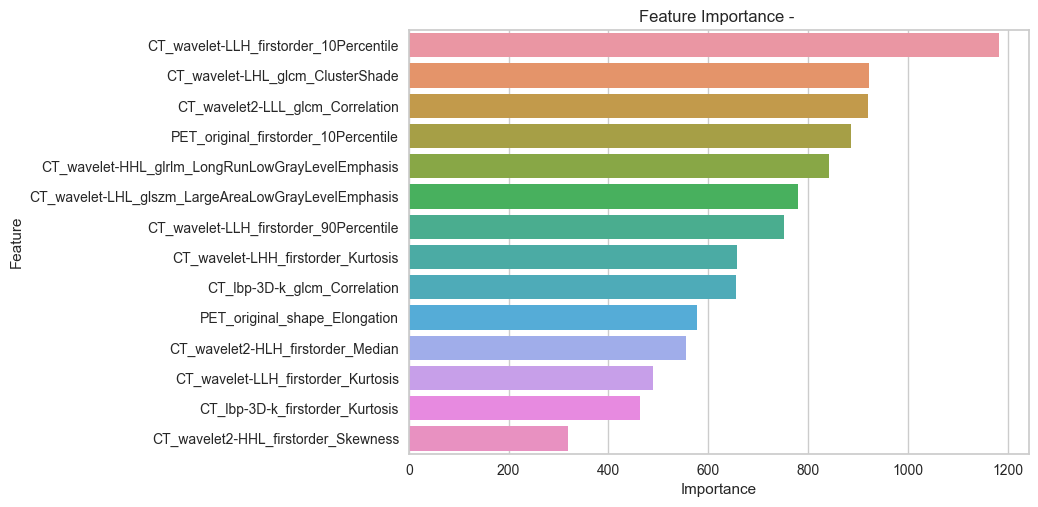

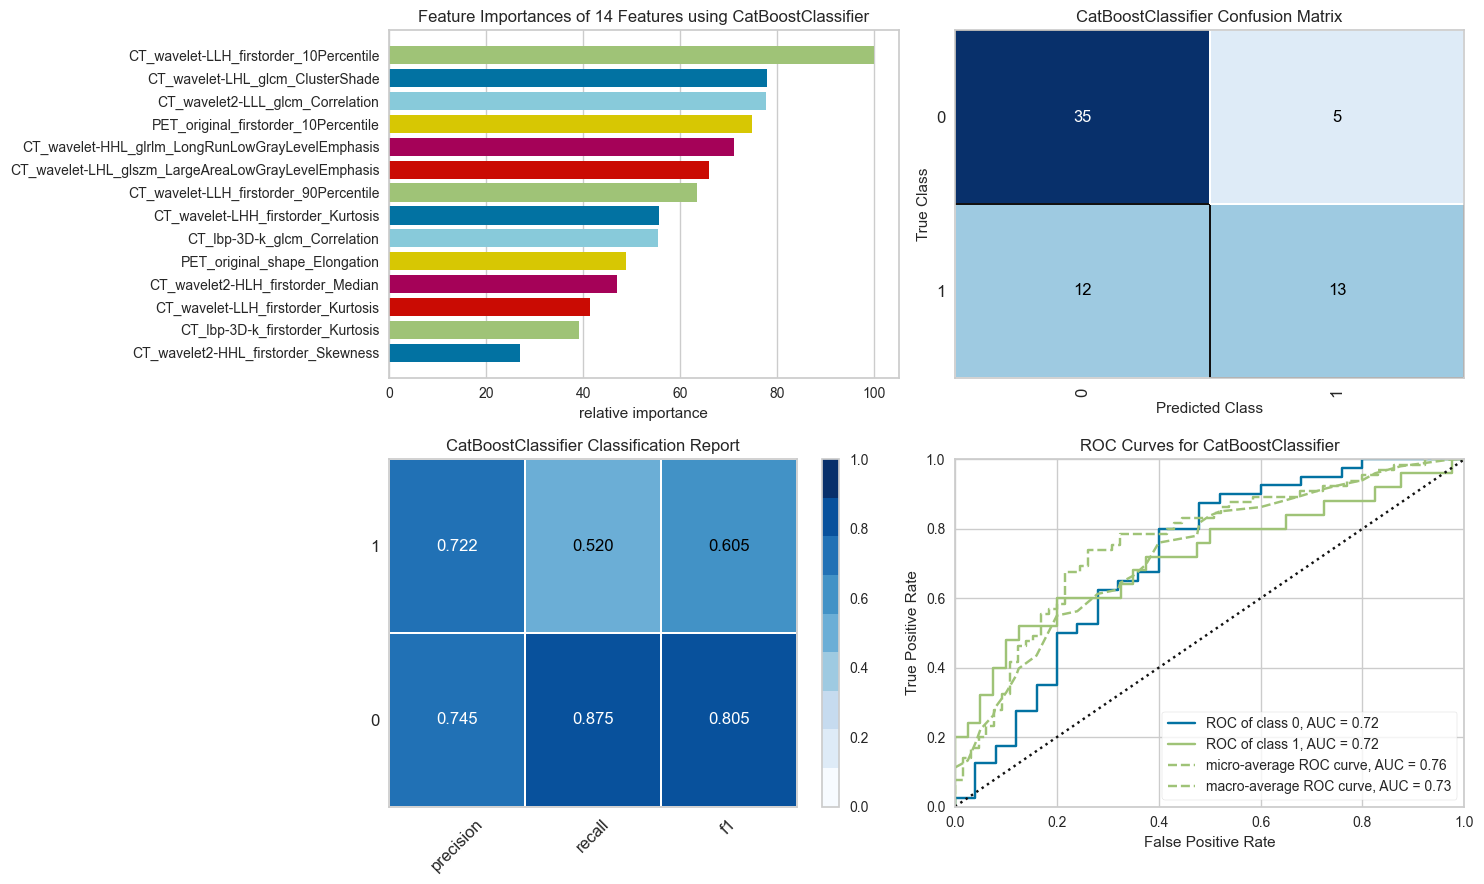

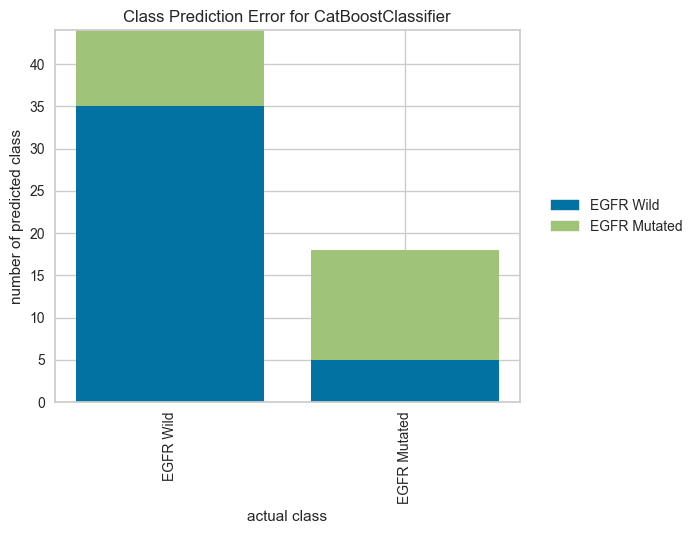

TypeError: __init__() got an unexpected keyword argument 'iterations'

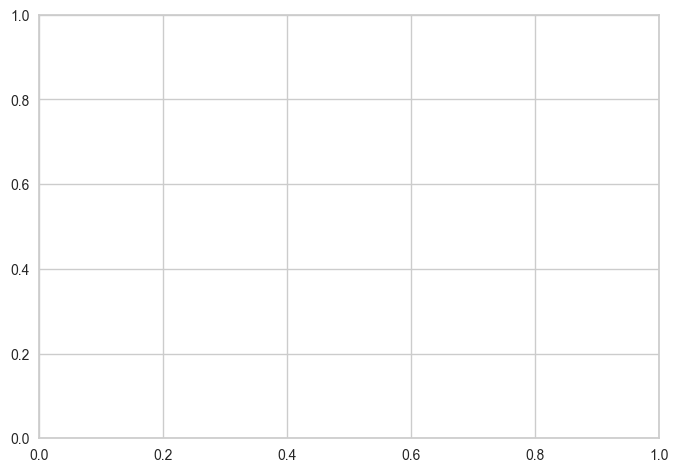

In [40]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [40]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6153846153846154

In [41]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-ADB73', Save_format = 'csv',Save_type = 'col')

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.69      0.68      0.68        40
    EGFR E21       0.50      0.52      0.51        25

    accuracy                           0.62        65
   macro avg       0.60      0.60      0.60        65
weighted avg       0.62      0.62      0.62        65

precision 0.5 accuracy 0.6153846153846154 recall 0.52 auc 0.5975


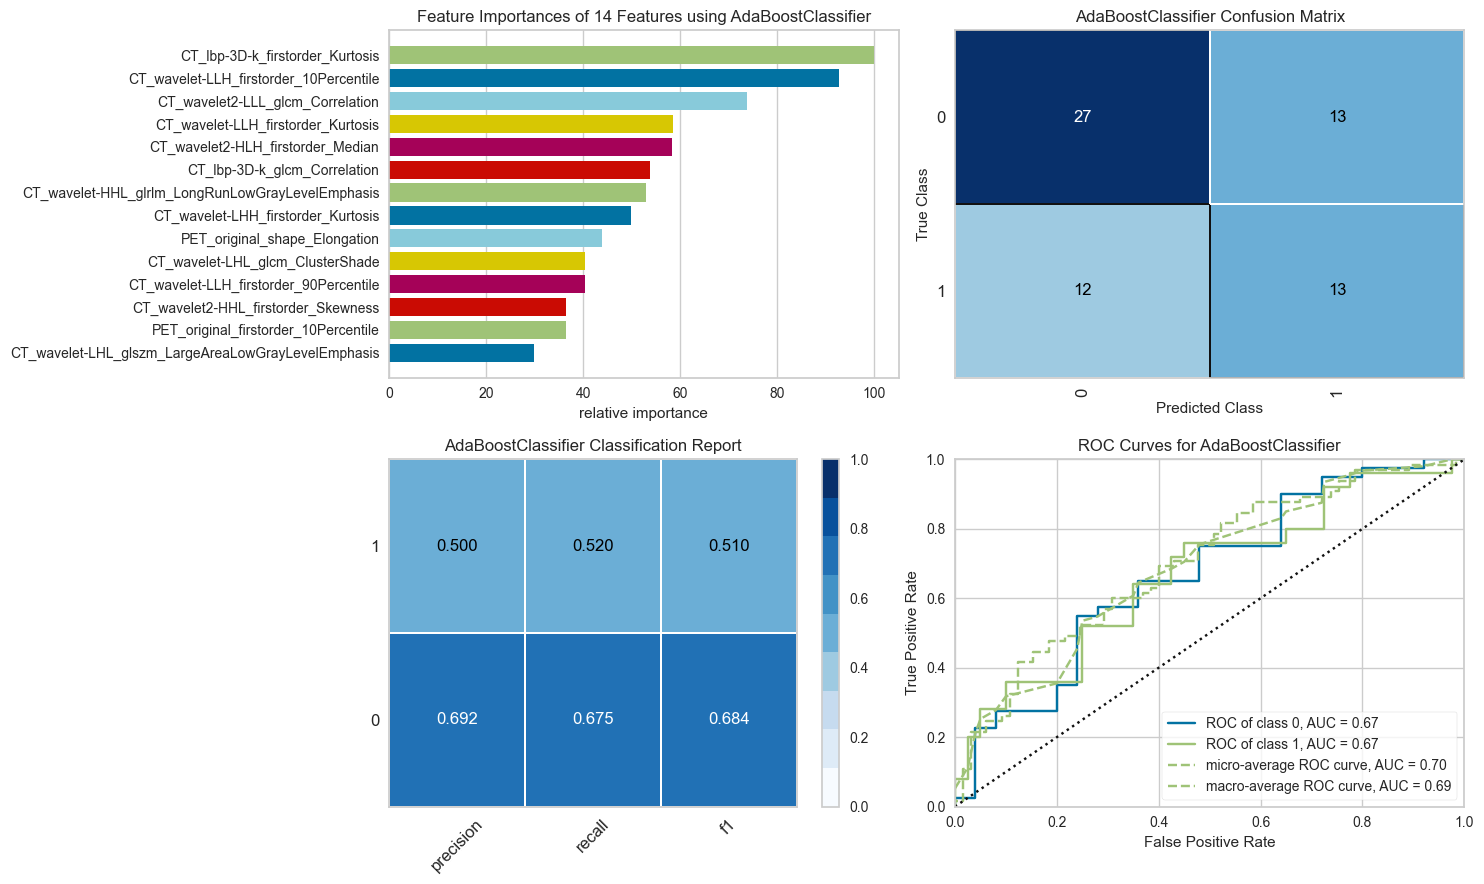

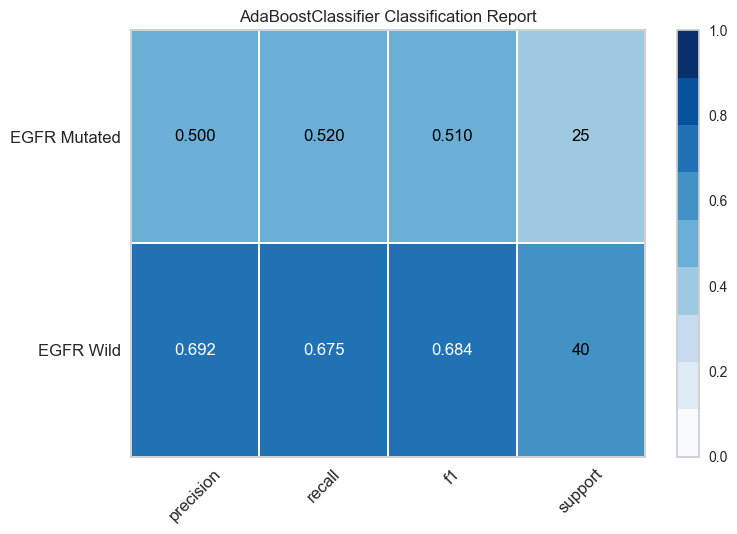

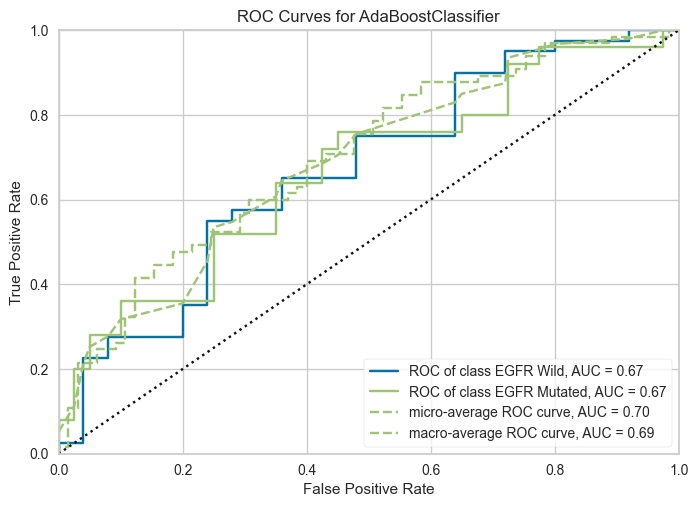

In [43]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [46]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6923076923076923

In [47]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-gbdt', Save_format = 'csv',Save_type = 'col')

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.73      0.80      0.76        40
EGFR Mutated       0.62      0.52      0.57        25

    accuracy                           0.69        65
   macro avg       0.67      0.66      0.66        65
weighted avg       0.69      0.69      0.69        65

precision 0.6190476190476191 accuracy 0.6923076923076923 recall 0.52 auc 0.6600000000000001


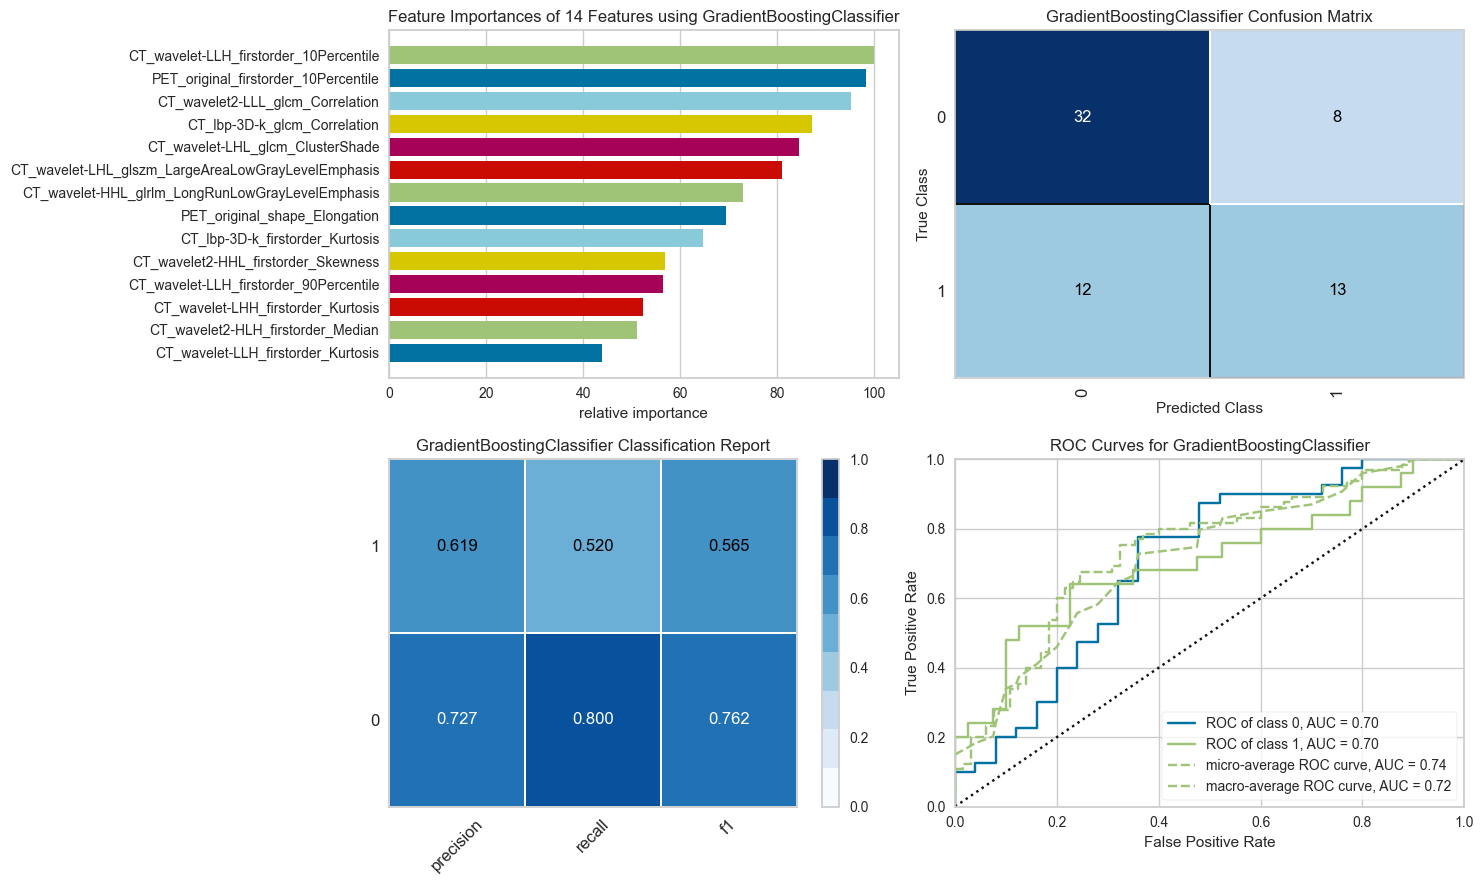

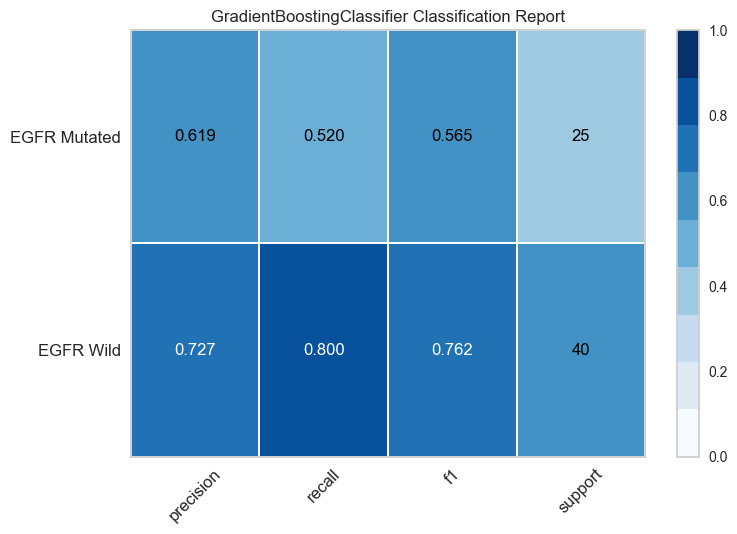

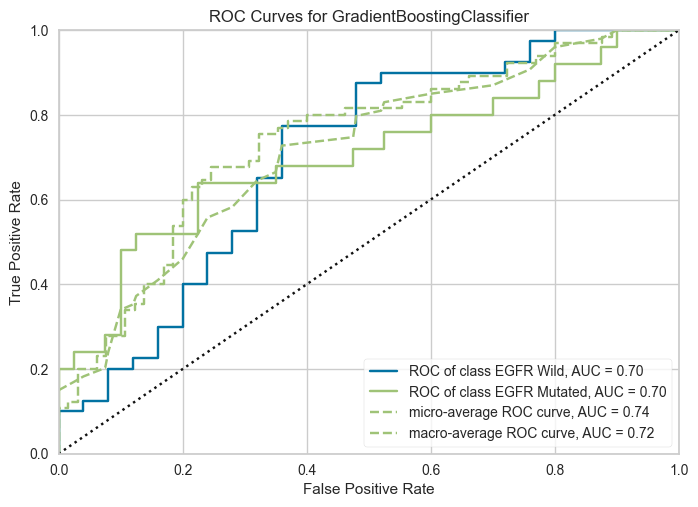

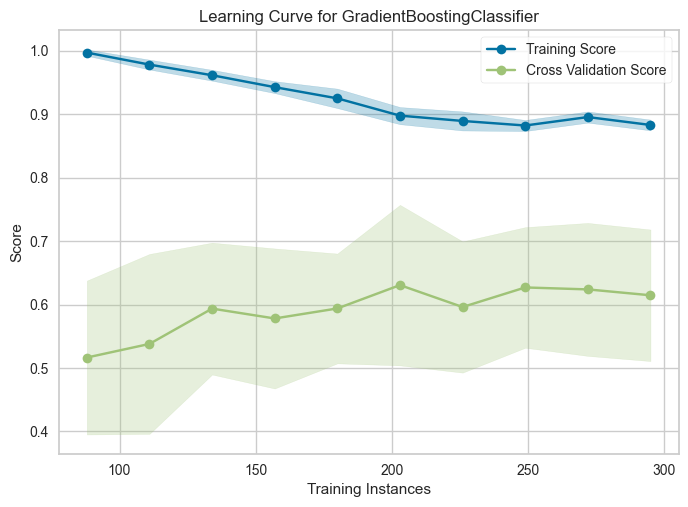

In [49]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [63]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [55]:
# SVC # 0.876623
import sklearn.svm as svm
import sklearn.model_selection as ms
'''***************************超参数优化及GridSearchCV属性：start*******************************'''
# 最优超参数组合列表
params = [
        {'kernel': ['linear'], 'C': [1, 10, 100, 100]},
        {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
       ]

svm_model = ms.GridSearchCV(svm.SVC(), params, refit=True,return_train_score=True,cv=10).fit(X_train, y_train)
# model.fit(X_train, y_train)

# GridSearchCV的属性
print('Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')
print('cv_results_:',svm_model.cv_results_.keys())
print('Desc:',svm_model.cv_results_['params'][2], svm_model.cv_results_['mean_train_score'][2], 
      svm_model.cv_results_['mean_test_score'][2],svm_model.cv_results_['rank_test_score'][2])
print('best_estimator_:',svm_model.best_estimator_) 
print('best_params_:',svm_model.best_params_) 
print('best_params_:', svm_model.cv_results_['params'][svm_model.best_index_])
print('best_score_:',svm_model.best_score_)
print('scorer_:',svm_model.scorer_)
print('n_splits_:',svm_model.n_splits_)
svm_cv_model = svm_model.best_params_
# rf_model = RandomForestClassifier(random_state=42)
# rf_params = {"n_estimators": [10,100, 200, 500, 1000,5000],
#              "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#              "max_depth": [1,2,3,4, 5, 8, None]}

# rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
# rf_cv_model.best_params_ # {'max_depth': 8, 'max_features': 5, 'min_samples_split': 30, 'n_estimators': 200}

Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
cv_results_: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_degree', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])
Desc: {'C': 100, 'kernel': 'linear'} 0.6355407523510971 0.5796923076923077 10
best_estimator_: SVC(C=100, gamma=0.01)
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
best_score_: 0.63523076923

In [56]:
print(svm_model.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [57]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.5846153846153846 0.565


In [58]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-SVM73', Save_format = 'csv',Save_type = 'col')

In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.67      0.65      0.66        40
EGFR Mutated       0.46      0.48      0.47        25

    accuracy                           0.58        65
   macro avg       0.56      0.56      0.56        65
weighted avg       0.59      0.58      0.59        65

precision 0.46153846153846156 accuracy 0.5846153846153846 recall 0.48 auc 0.565


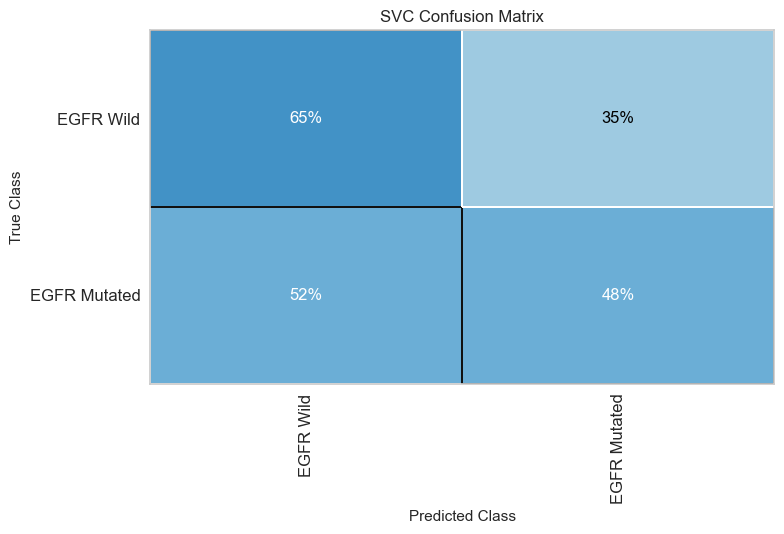

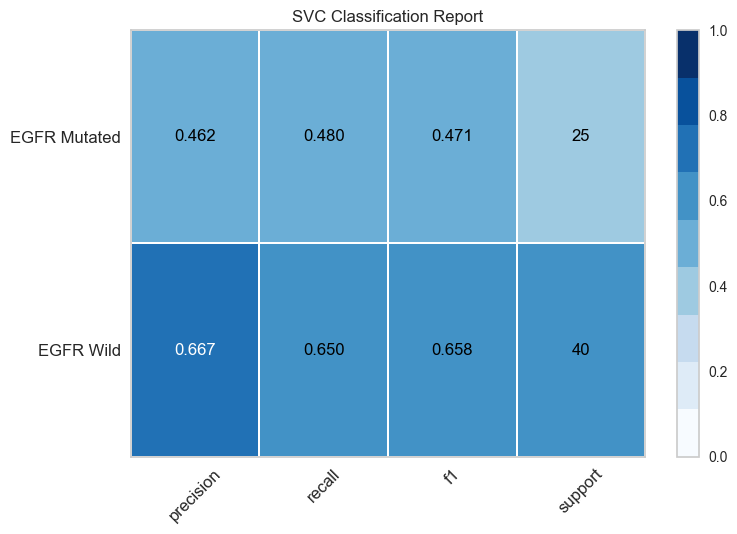

ModelError: no curves will be drawn; set binary=True.

In [60]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [63]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.7538461538461538

In [64]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-XGB73', Save_format = 'csv',Save_type = 'col')

In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.79      0.82      0.80        40
EGFR Mutated       0.70      0.64      0.67        25

    accuracy                           0.75        65
   macro avg       0.74      0.73      0.74        65
weighted avg       0.75      0.75      0.75        65

precision 0.6956521739130435 accuracy 0.7538461538461538 recall 0.64 auc 0.7324999999999999


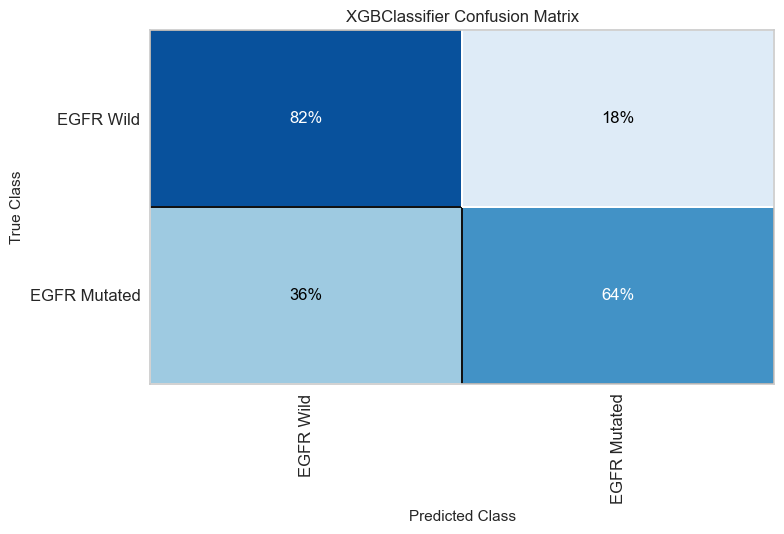

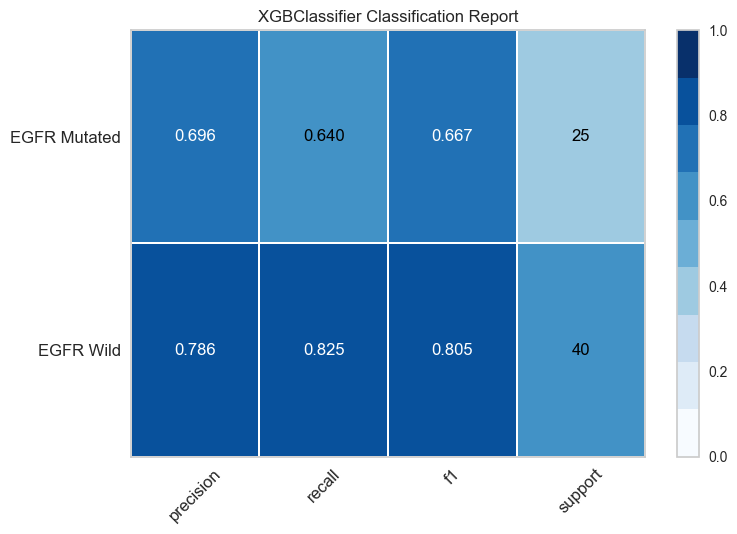

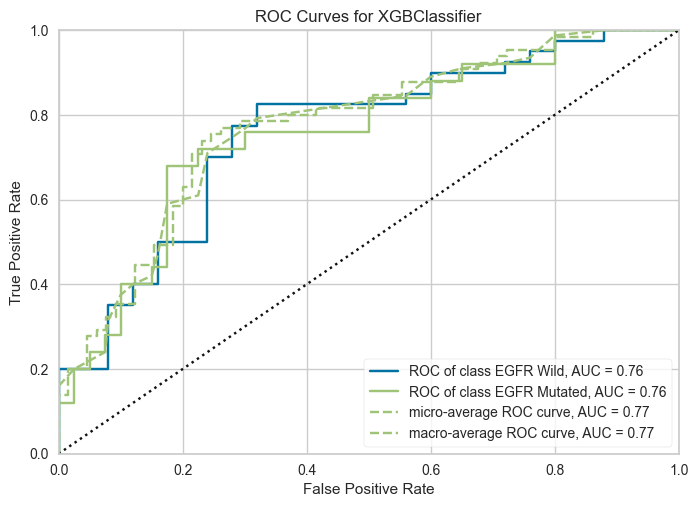

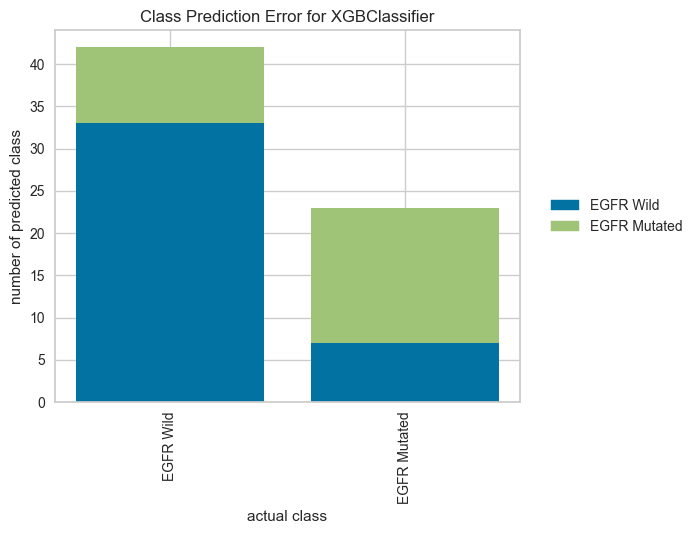

In [66]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [68]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6461538461538462

In [69]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-lgb73', Save_format = 'csv',Save_type = 'col')

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-KNN19-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.73      0.68      0.70        40
EGFR Mutated       0.54      0.60      0.57        25

    accuracy                           0.65        65
   macro avg       0.63      0.64      0.63        65
weighted avg       0.66      0.65      0.65        65

precision 0.5357142857142857 accuracy 0.6461538461538462 recall 0.6 auc 0.6375000000000001


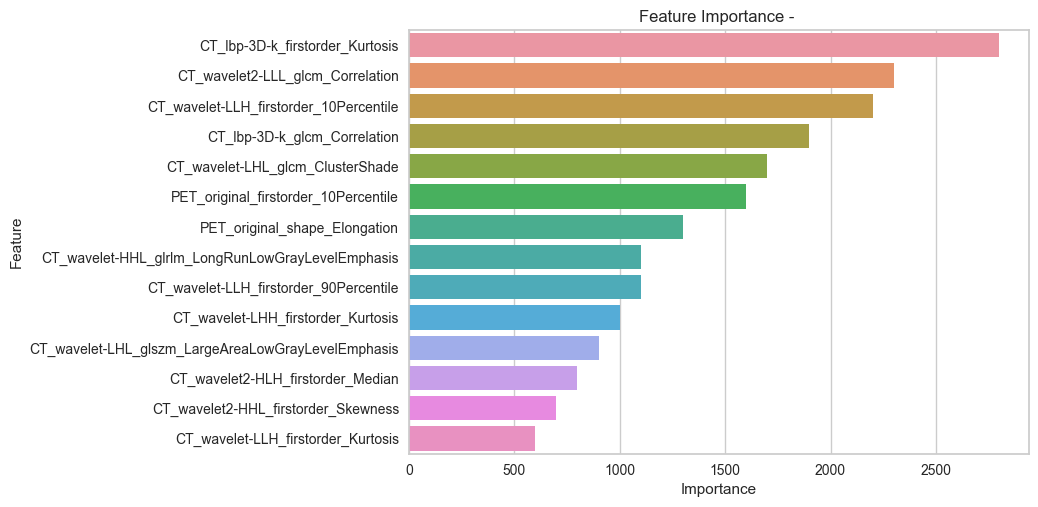

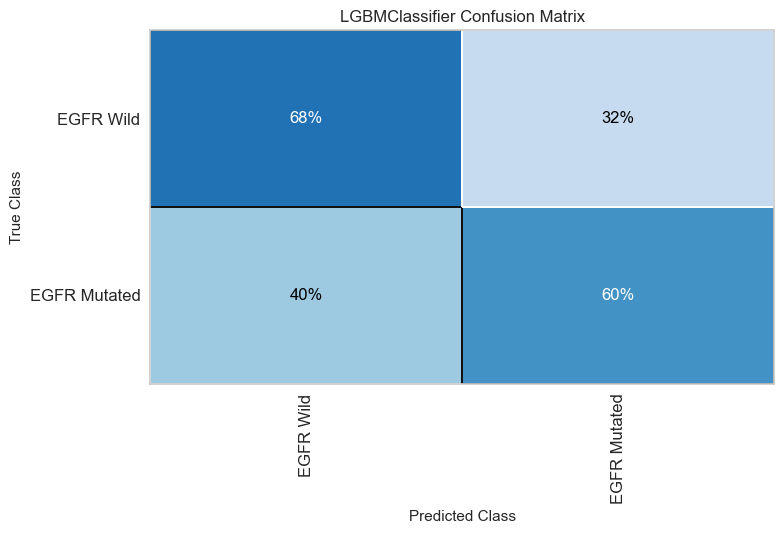

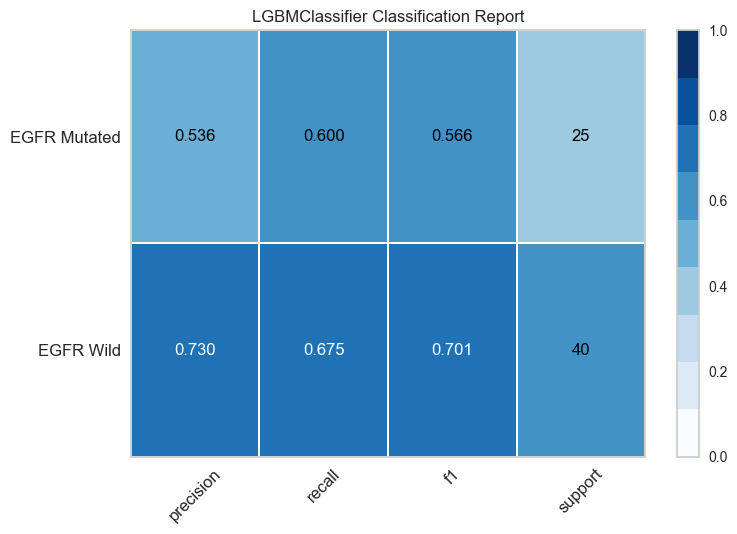

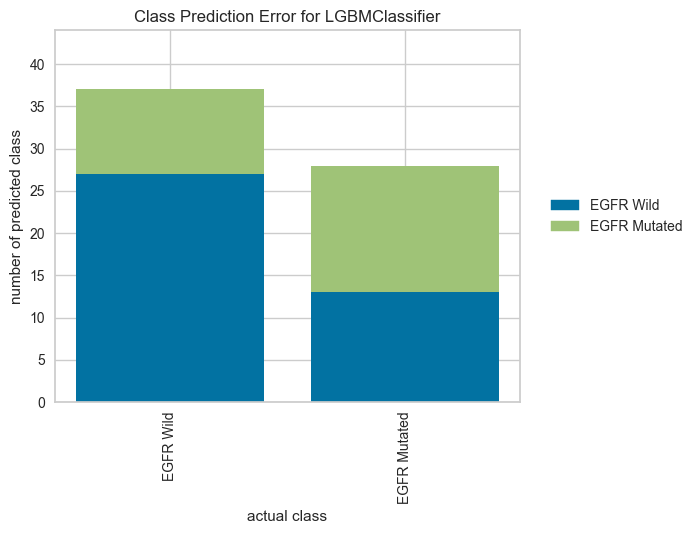

In [71]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [41]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
#                 ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6923360	total: 13.3ms	remaining: 6.62s
1:	learn: 0.6906864	total: 14ms	remaining: 3.49s
2:	learn: 0.6899116	total: 14.8ms	remaining: 2.45s
3:	learn: 0.6892168	total: 15.6ms	remaining: 1.93s
4:	learn: 0.6879831	total: 16.3ms	remaining: 1.61s
5:	learn: 0.6868783	total: 17.1ms	remaining: 1.41s
6:	learn: 0.6859240	total: 17.7ms	remaining: 1.24s
7:	learn: 0.6851188	total: 18.1ms	remaining: 1.11s
8:	learn: 0.6842406	total: 18.7ms	remaining: 1.02s
9:	learn: 0.6833632	total: 19.2ms	remaining: 939ms
10:	learn: 0.6821516	total: 19.7ms	remaining: 876ms
11:	learn: 0.6814455	total: 20.2ms	remaining: 821ms
12:	learn: 0.6808152	total: 20.7ms	remaining: 775ms
13:	learn: 0.6800423	total: 21.2ms	remaining: 737ms
14:	learn: 0.6790229	total: 21.7ms	remaining: 703ms
15:	learn: 0.6780557	total: 22.2ms	remaining: 672ms
16:	learn: 0.6770297	total: 22.7ms	remaining: 646ms
17:	learn: 0.6758918	total: 23.2ms	remaining: 62

266:	learn: 0.5353265	total: 148ms	remaining: 129ms
267:	learn: 0.5349311	total: 148ms	remaining: 128ms
268:	learn: 0.5346476	total: 149ms	remaining: 128ms
269:	learn: 0.5344092	total: 149ms	remaining: 127ms
270:	learn: 0.5337852	total: 150ms	remaining: 127ms
271:	learn: 0.5334359	total: 151ms	remaining: 126ms
272:	learn: 0.5331689	total: 151ms	remaining: 126ms
273:	learn: 0.5327330	total: 152ms	remaining: 125ms
274:	learn: 0.5324111	total: 152ms	remaining: 124ms
275:	learn: 0.5321770	total: 153ms	remaining: 124ms
276:	learn: 0.5317313	total: 153ms	remaining: 123ms
277:	learn: 0.5312788	total: 154ms	remaining: 123ms
278:	learn: 0.5310947	total: 154ms	remaining: 122ms
279:	learn: 0.5308511	total: 155ms	remaining: 121ms
280:	learn: 0.5305685	total: 155ms	remaining: 121ms
281:	learn: 0.5299516	total: 156ms	remaining: 120ms
282:	learn: 0.5295652	total: 156ms	remaining: 120ms
283:	learn: 0.5293402	total: 157ms	remaining: 119ms
284:	learn: 0.5289302	total: 157ms	remaining: 118ms
285:	learn: 

In [84]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6914018	total: 504us	remaining: 252ms
1:	learn: 0.6901028	total: 1.12ms	remaining: 279ms
2:	learn: 0.6891222	total: 1.55ms	remaining: 257ms
3:	learn: 0.6881131	total: 1.97ms	remaining: 244ms
4:	learn: 0.6871172	total: 2.41ms	remaining: 238ms
5:	learn: 0.6843598	total: 2.82ms	remaining: 232ms
6:	learn: 0.6831484	total: 3.24ms	remaining: 228ms
7:	learn: 0.6823136	total: 3.65ms	remaining: 224ms
8:	learn: 0.6804290	total: 4.07ms	remaining: 222ms
9:	learn: 0.6790255	total: 4.48ms	remaining: 219ms
10:	learn: 0.6780734	total: 4.89ms	remaining: 217ms
11:	learn: 0.6767100	total: 5.3ms	remaining: 216ms
12:	learn: 0.6752710	total: 5.75ms	remaining: 216ms
13:	learn: 0.6742911	total: 6.16ms	remaining: 214ms
14:	learn: 0.6733882	total: 6.55ms	remaining: 212ms
15:	learn: 0.6719205	total: 6.94ms	remaining: 210ms
16:	learn: 0.6707262	total: 7.39ms	remaining: 210ms
17:	learn: 0.6690413	total: 7.78ms	remaining: 208ms
18:	learn: 0.6679717	total: 8.2ms	remaining: 207ms
19:	learn: 0.6668611	tota

367:	learn: 0.4045217	total: 151ms	remaining: 54.3ms
368:	learn: 0.4040080	total: 152ms	remaining: 53.9ms
369:	learn: 0.4034703	total: 152ms	remaining: 53.5ms
370:	learn: 0.4029226	total: 153ms	remaining: 53.1ms
371:	learn: 0.4026484	total: 153ms	remaining: 52.7ms
372:	learn: 0.4018688	total: 154ms	remaining: 52.3ms
373:	learn: 0.4014111	total: 154ms	remaining: 51.9ms
374:	learn: 0.4007764	total: 154ms	remaining: 51.5ms
375:	learn: 0.4006386	total: 155ms	remaining: 51.1ms
376:	learn: 0.4000338	total: 155ms	remaining: 50.6ms
377:	learn: 0.3995918	total: 156ms	remaining: 50.2ms
378:	learn: 0.3994086	total: 156ms	remaining: 49.8ms
379:	learn: 0.3991983	total: 156ms	remaining: 49.4ms
380:	learn: 0.3988906	total: 157ms	remaining: 49ms
381:	learn: 0.3984721	total: 157ms	remaining: 48.6ms
382:	learn: 0.3978423	total: 158ms	remaining: 48.2ms
383:	learn: 0.3973920	total: 158ms	remaining: 47.7ms
384:	learn: 0.3969737	total: 159ms	remaining: 47.4ms
385:	learn: 0.3966861	total: 159ms	remaining: 47

190:	learn: 0.4891423	total: 76.8ms	remaining: 124ms
191:	learn: 0.4887417	total: 77.3ms	remaining: 124ms
192:	learn: 0.4881165	total: 77.7ms	remaining: 124ms
193:	learn: 0.4876000	total: 78.1ms	remaining: 123ms
194:	learn: 0.4867842	total: 78.6ms	remaining: 123ms
195:	learn: 0.4857338	total: 79.1ms	remaining: 123ms
196:	learn: 0.4852777	total: 79.5ms	remaining: 122ms
197:	learn: 0.4845610	total: 80ms	remaining: 122ms
198:	learn: 0.4839669	total: 80.4ms	remaining: 122ms
199:	learn: 0.4826166	total: 80.8ms	remaining: 121ms
200:	learn: 0.4820269	total: 81.2ms	remaining: 121ms
201:	learn: 0.4809130	total: 81.6ms	remaining: 120ms
202:	learn: 0.4795153	total: 82ms	remaining: 120ms
203:	learn: 0.4791622	total: 82.4ms	remaining: 120ms
204:	learn: 0.4784084	total: 82.8ms	remaining: 119ms
205:	learn: 0.4778542	total: 83.2ms	remaining: 119ms
206:	learn: 0.4776776	total: 83.6ms	remaining: 118ms
207:	learn: 0.4774776	total: 84ms	remaining: 118ms
208:	learn: 0.4769580	total: 84.4ms	remaining: 118ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0444 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0445 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0445 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0445 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0445 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0445 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0445 val_loss=0.00

305:	learn: 0.5100210	total: 156ms	remaining: 98.8ms
306:	learn: 0.5097449	total: 156ms	remaining: 98.3ms
307:	learn: 0.5090852	total: 157ms	remaining: 97.8ms
308:	learn: 0.5084787	total: 157ms	remaining: 97.3ms
309:	learn: 0.5082727	total: 158ms	remaining: 96.9ms
310:	learn: 0.5079746	total: 159ms	remaining: 96.3ms
311:	learn: 0.5075419	total: 159ms	remaining: 95.8ms
312:	learn: 0.5071107	total: 159ms	remaining: 95.2ms
313:	learn: 0.5068143	total: 160ms	remaining: 94.7ms
314:	learn: 0.5065331	total: 160ms	remaining: 94.1ms
315:	learn: 0.5062869	total: 161ms	remaining: 93.6ms
316:	learn: 0.5060814	total: 161ms	remaining: 93.1ms
317:	learn: 0.5053920	total: 162ms	remaining: 92.6ms
318:	learn: 0.5048143	total: 162ms	remaining: 92.1ms
319:	learn: 0.5043204	total: 163ms	remaining: 91.6ms
320:	learn: 0.5038602	total: 163ms	remaining: 91.1ms
321:	learn: 0.5036504	total: 164ms	remaining: 90.5ms
322:	learn: 0.5031964	total: 164ms	remaining: 90ms
323:	learn: 0.5026707	total: 165ms	remaining: 89

[iter 100] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1600] loss=0.1061 val_loss=0

396:	learn: 0.3476951	total: 159ms	remaining: 41.1ms
397:	learn: 0.3470053	total: 159ms	remaining: 40.8ms
398:	learn: 0.3467602	total: 159ms	remaining: 40.3ms
399:	learn: 0.3465017	total: 160ms	remaining: 39.9ms
400:	learn: 0.3460868	total: 160ms	remaining: 39.5ms
401:	learn: 0.3458082	total: 161ms	remaining: 39.1ms
402:	learn: 0.3457317	total: 161ms	remaining: 38.7ms
403:	learn: 0.3453417	total: 161ms	remaining: 38.3ms
404:	learn: 0.3451661	total: 162ms	remaining: 37.9ms
405:	learn: 0.3443648	total: 162ms	remaining: 37.5ms
406:	learn: 0.3438671	total: 163ms	remaining: 37.1ms
407:	learn: 0.3431460	total: 163ms	remaining: 36.7ms
408:	learn: 0.3423719	total: 163ms	remaining: 36.3ms
409:	learn: 0.3418685	total: 164ms	remaining: 35.9ms
410:	learn: 0.3413009	total: 164ms	remaining: 35.5ms
411:	learn: 0.3408609	total: 164ms	remaining: 35.1ms
412:	learn: 0.3406350	total: 165ms	remaining: 34.7ms
413:	learn: 0.3399488	total: 165ms	remaining: 34.3ms
414:	learn: 0.3395688	total: 166ms	remaining: 

227:	learn: 0.5016443	total: 90.1ms	remaining: 107ms
228:	learn: 0.5010931	total: 90.6ms	remaining: 107ms
229:	learn: 0.4997284	total: 91ms	remaining: 107ms
230:	learn: 0.4989549	total: 91.5ms	remaining: 107ms
231:	learn: 0.4983343	total: 92ms	remaining: 106ms
232:	learn: 0.4970544	total: 92.4ms	remaining: 106ms
233:	learn: 0.4966815	total: 92.8ms	remaining: 106ms
234:	learn: 0.4961856	total: 93.2ms	remaining: 105ms
235:	learn: 0.4957224	total: 93.6ms	remaining: 105ms
236:	learn: 0.4954602	total: 94ms	remaining: 104ms
237:	learn: 0.4952975	total: 94.4ms	remaining: 104ms
238:	learn: 0.4942074	total: 94.8ms	remaining: 103ms
239:	learn: 0.4931023	total: 95.1ms	remaining: 103ms
240:	learn: 0.4924804	total: 95.5ms	remaining: 103ms
241:	learn: 0.4918225	total: 95.9ms	remaining: 102ms
242:	learn: 0.4913059	total: 96.3ms	remaining: 102ms
243:	learn: 0.4904110	total: 96.7ms	remaining: 101ms
244:	learn: 0.4894827	total: 97.1ms	remaining: 101ms
245:	learn: 0.4885557	total: 97.5ms	remaining: 101ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0787 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.0788 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.0788 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.0788 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.0789 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.0789 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.0790 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.0790 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.0790 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.0791 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.0791 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.0792 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.0792 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.0792 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.0792 val_loss=0.00

354:	learn: 0.4904667	total: 161ms	remaining: 65.8ms
355:	learn: 0.4901177	total: 162ms	remaining: 65.4ms
356:	learn: 0.4899923	total: 162ms	remaining: 65ms
357:	learn: 0.4896145	total: 163ms	remaining: 64.6ms
358:	learn: 0.4892404	total: 163ms	remaining: 64.2ms
359:	learn: 0.4889665	total: 164ms	remaining: 63.8ms
360:	learn: 0.4887308	total: 164ms	remaining: 63.3ms
361:	learn: 0.4885665	total: 165ms	remaining: 62.9ms
362:	learn: 0.4883786	total: 165ms	remaining: 62.4ms
363:	learn: 0.4881247	total: 166ms	remaining: 61.9ms
364:	learn: 0.4876660	total: 166ms	remaining: 61.5ms
365:	learn: 0.4873749	total: 167ms	remaining: 61ms
366:	learn: 0.4868765	total: 167ms	remaining: 60.6ms
367:	learn: 0.4864038	total: 168ms	remaining: 60.1ms
368:	learn: 0.4863215	total: 168ms	remaining: 59.6ms
369:	learn: 0.4858755	total: 168ms	remaining: 59.2ms
370:	learn: 0.4853609	total: 169ms	remaining: 58.7ms
371:	learn: 0.4852120	total: 169ms	remaining: 58.3ms
372:	learn: 0.4848824	total: 170ms	remaining: 57.8

[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1600] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1700] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2300] loss=0.1062 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 2400] loss=0.1062 va

In [85]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [86]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

0.5944160272804775

In [87]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-KNN19-stack73', Save_format = 'csv',Save_type = 'col')

In [42]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3/RFE-RF-GB/KNN191")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [44]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-KNN14.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [45]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"

In [46]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.54      0.71      0.61        31
EGFR Mutated       0.53      0.34      0.42        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.51        60
weighted avg       0.53      0.53      0.52        60

precision 0.5263157894736842 accuracy 0.5333333333333333 recall 0.3448275862068966 auc 0.5272525027808677


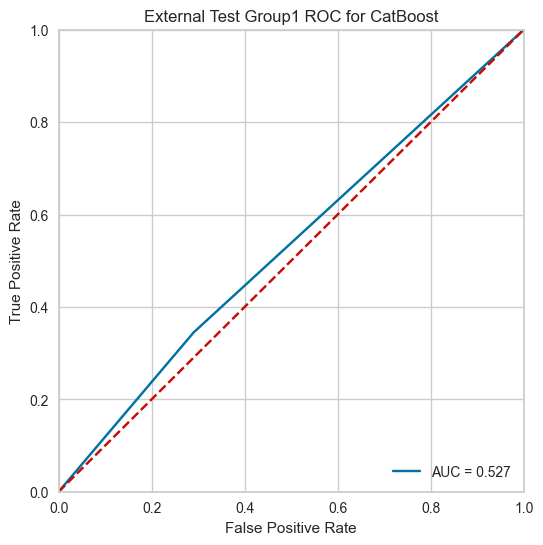

In [47]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [48]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  9]
 [19 10]]
Normalized confusion matrix
[[0.71 0.29]
 [0.66 0.34]]


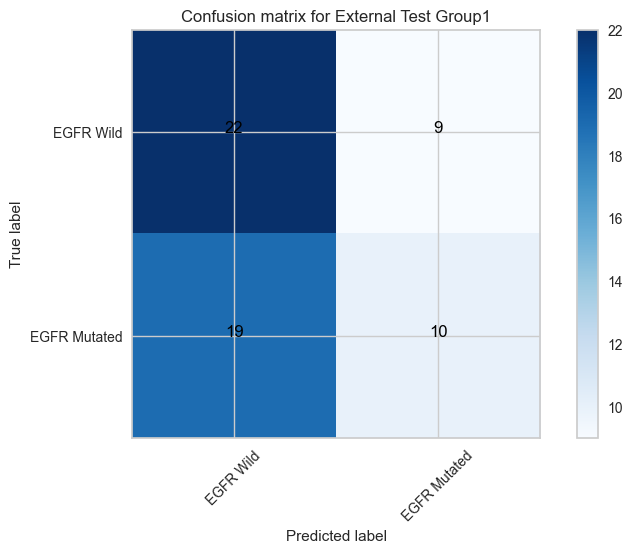

In [49]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [50]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.52      0.71      0.60        31
EGFR Mutated       0.50      0.31      0.38        29

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.49        60
weighted avg       0.51      0.52      0.50        60

precision 0.5 accuracy 0.5166666666666667 recall 0.3103448275862069 auc 0.5100111234705228


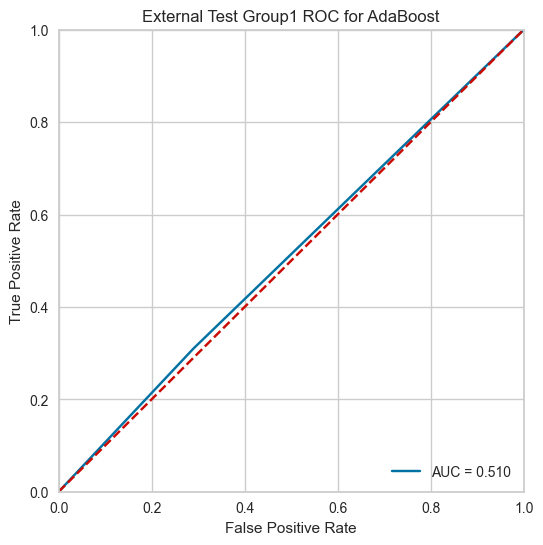

In [51]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [52]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  9]
 [20  9]]
Normalized confusion matrix
[[0.71 0.29]
 [0.69 0.31]]


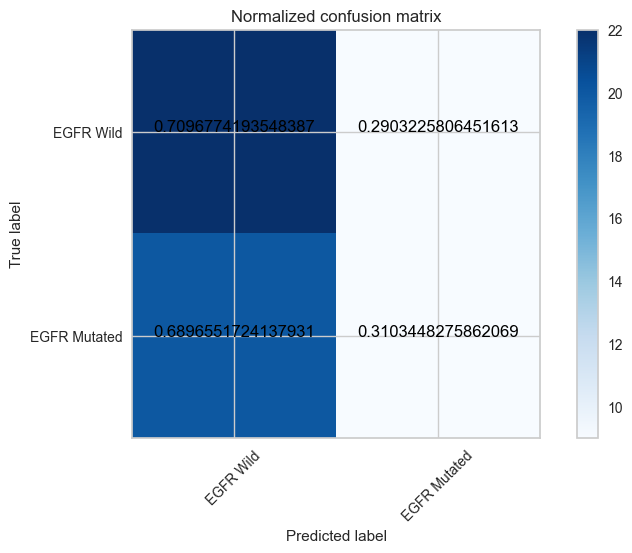

In [53]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [54]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.56      0.61      0.58        31
EGFR Mutated       0.54      0.48      0.51        29

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.55      0.55      0.55        60

precision 0.5486425339366516 accuracy 0.55 recall 0.5478309232480534 auc 0.5478309232480535


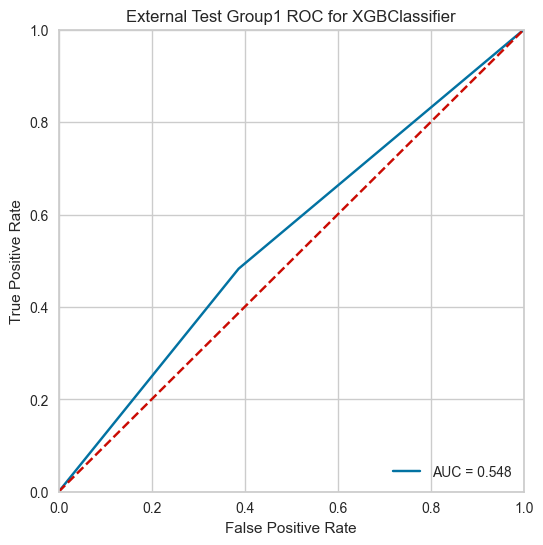

In [55]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19 12]
 [15 14]]
Normalized confusion matrix
[[0.61 0.39]
 [0.52 0.48]]


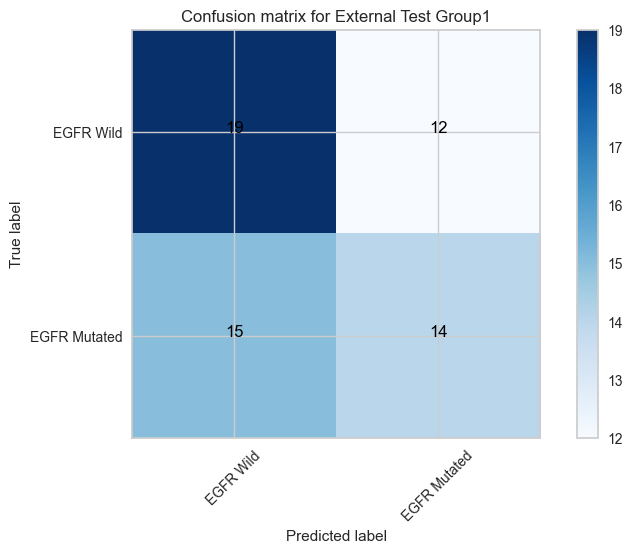

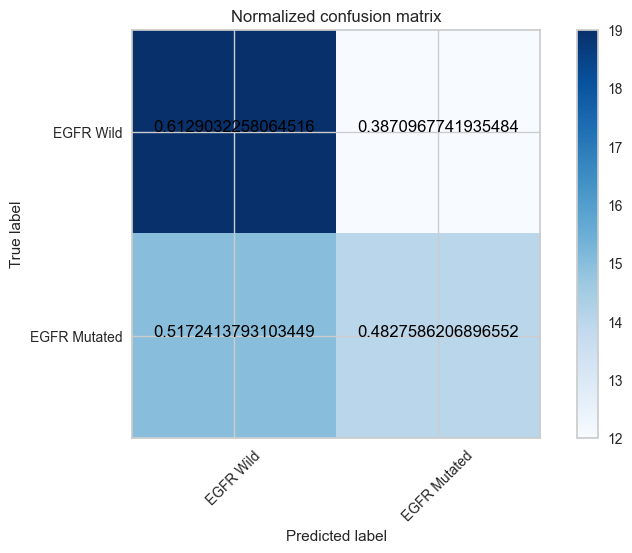

In [57]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [58]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.45      0.48      0.47        31
EGFR Mutated       0.41      0.38      0.39        29

    accuracy                           0.43        60
   macro avg       0.43      0.43      0.43        60
weighted avg       0.43      0.43      0.43        60

precision 0.4074074074074074 accuracy 0.43333333333333335 recall 0.3793103448275862 auc 0.4315906562847609


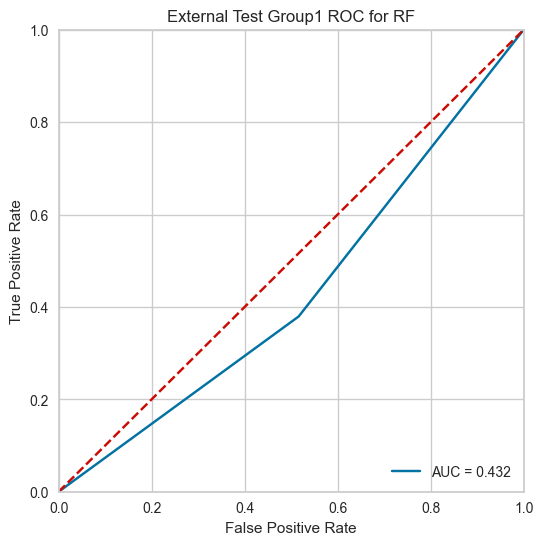

In [59]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[15 16]
 [18 11]]
Normalized confusion matrix
[[0.48 0.52]
 [0.62 0.38]]


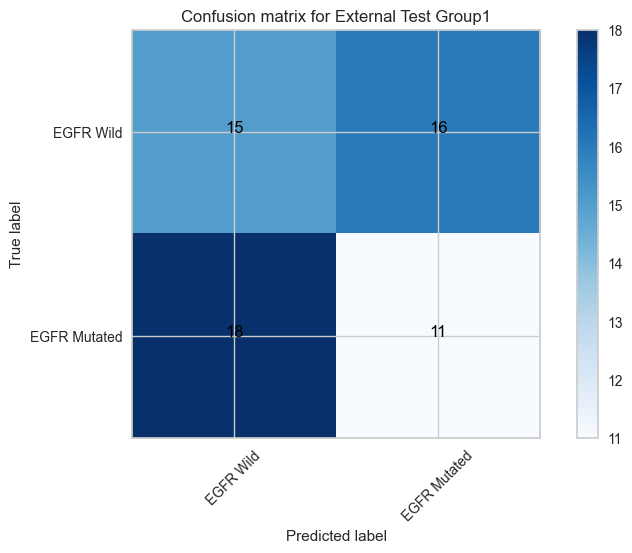

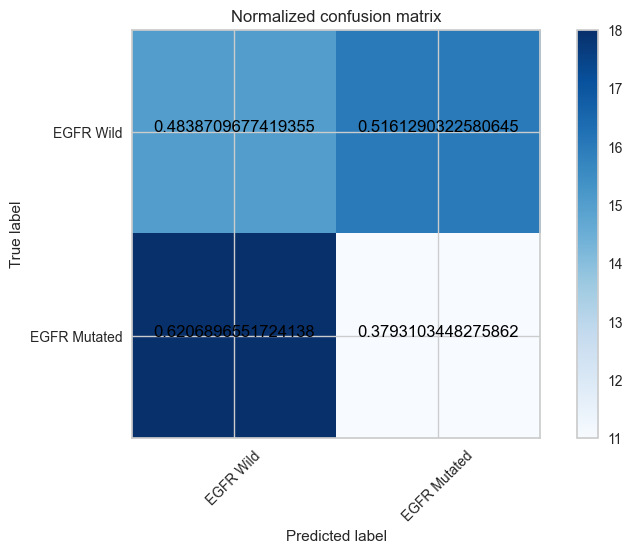

In [60]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [61]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.51      0.71      0.59        31
EGFR Mutated       0.47      0.28      0.35        29

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.47        60
weighted avg       0.49      0.50      0.48        60

precision 0.47058823529411764 accuracy 0.5 recall 0.27586206896551724 auc 0.492769744160178


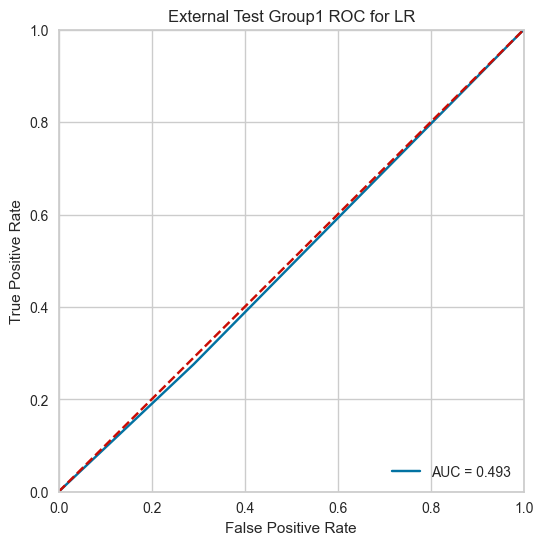

In [62]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[22  9]
 [21  8]]
Normalized confusion matrix
[[0.71 0.29]
 [0.72 0.28]]


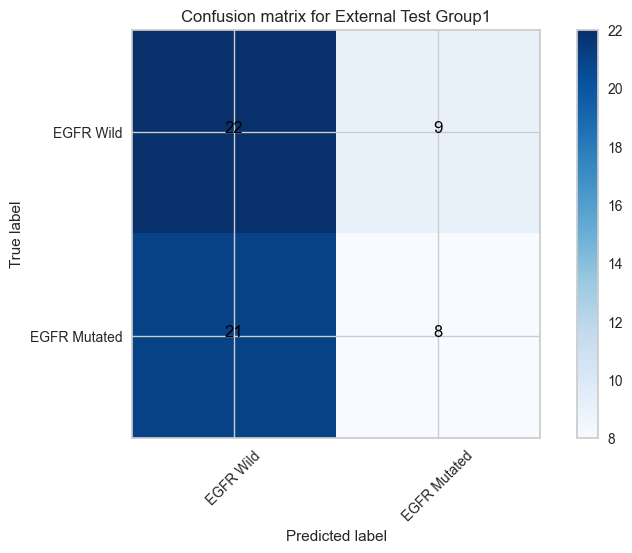

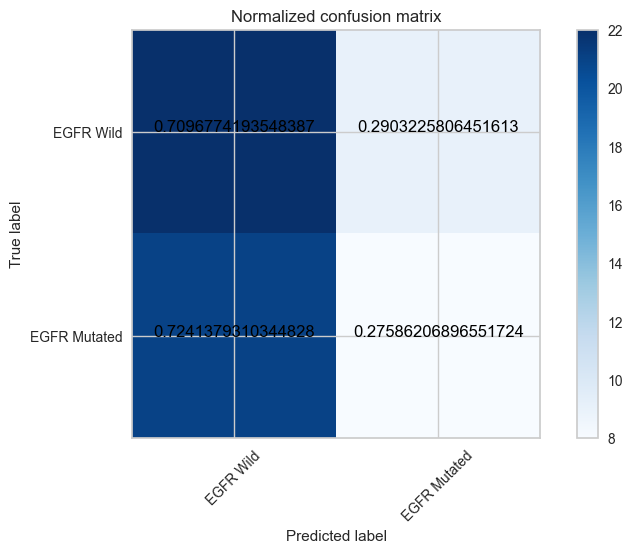

In [63]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [64]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      1.00      0.68        31
EGFR Mutated       0.00      0.00      0.00        29

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60

precision 0.0 accuracy 0.5166666666666667 recall 0.0 auc 0.5


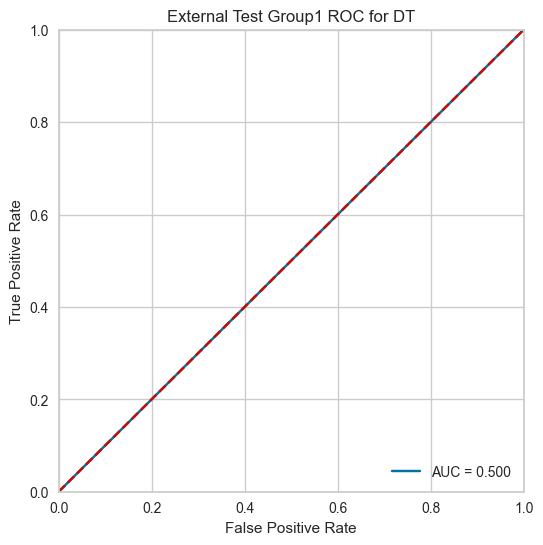

In [65]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[31  0]
 [29  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


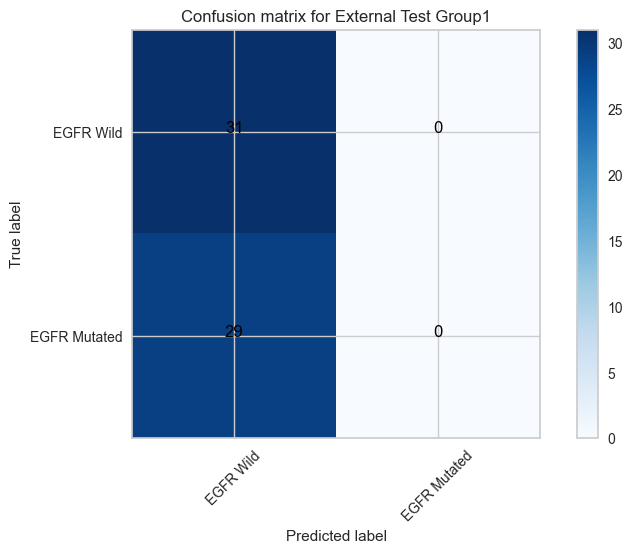

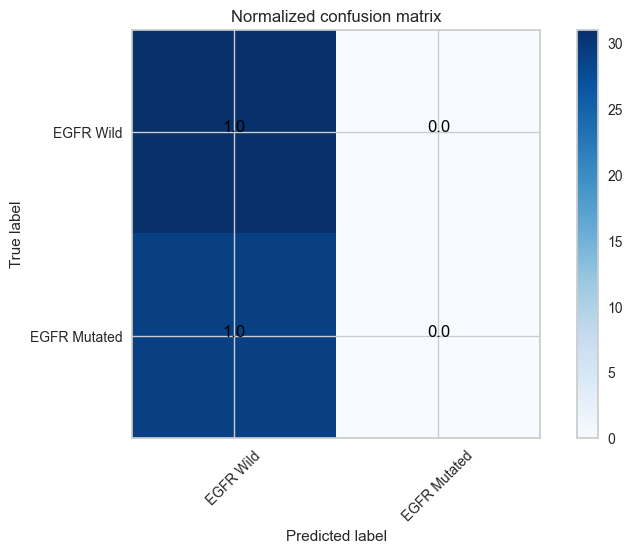

In [66]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.48      0.68      0.56        31
EGFR Mutated       0.38      0.21      0.27        29

    accuracy                           0.45        60
   macro avg       0.43      0.44      0.41        60
weighted avg       0.43      0.45      0.42        60

precision 0.375 accuracy 0.45 recall 0.20689655172413793 auc 0.4421579532814239


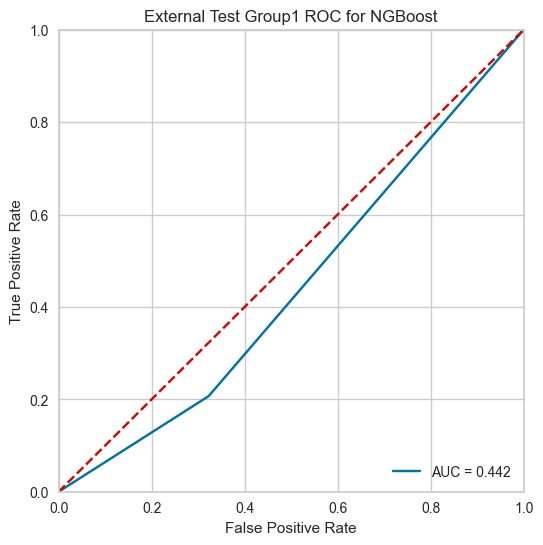

In [68]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[21 10]
 [23  6]]
Normalized confusion matrix
[[0.68 0.32]
 [0.79 0.21]]


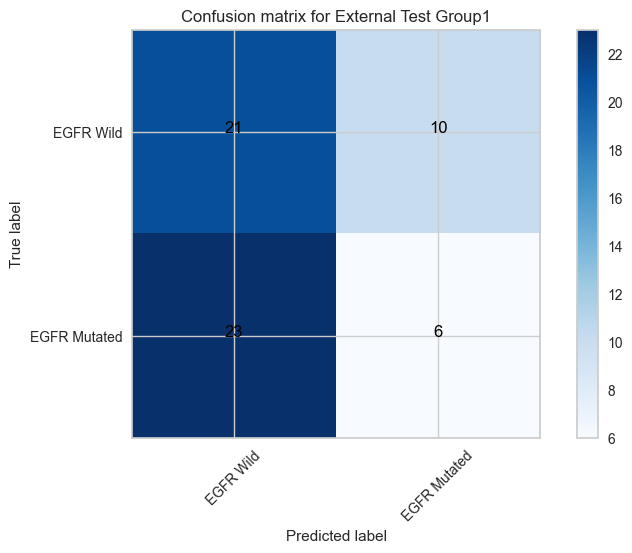

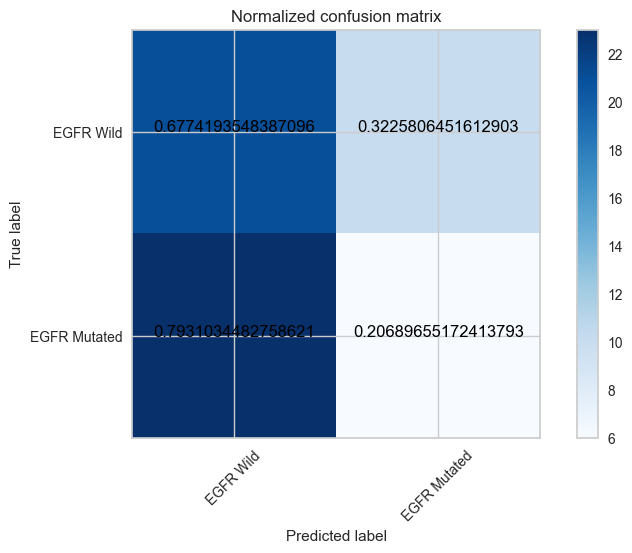

In [69]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [70]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.54      0.68      0.60        31
EGFR Mutated       0.52      0.38      0.44        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.52        60
weighted avg       0.53      0.53      0.52        60

precision 0.5238095238095238 accuracy 0.5333333333333333 recall 0.3793103448275862 auc 0.528364849833148


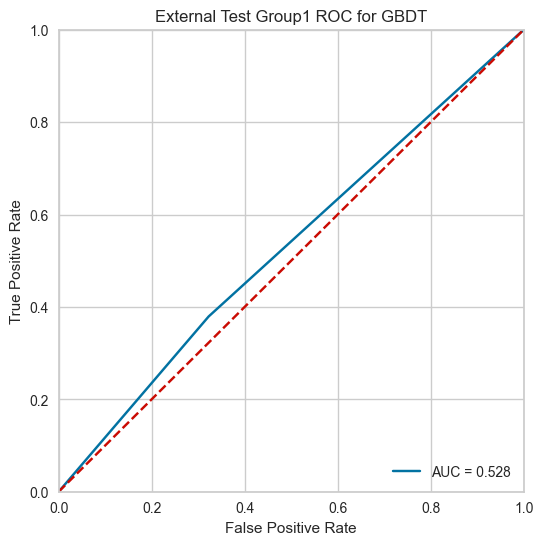

In [71]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[21 10]
 [18 11]]
Normalized confusion matrix
[[0.68 0.32]
 [0.62 0.38]]


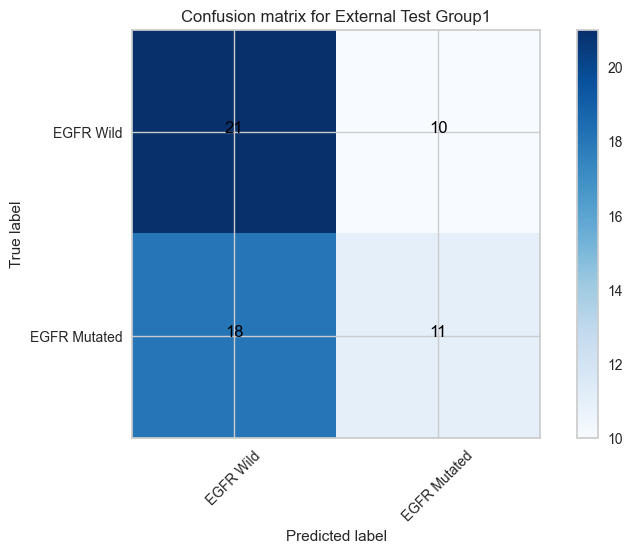

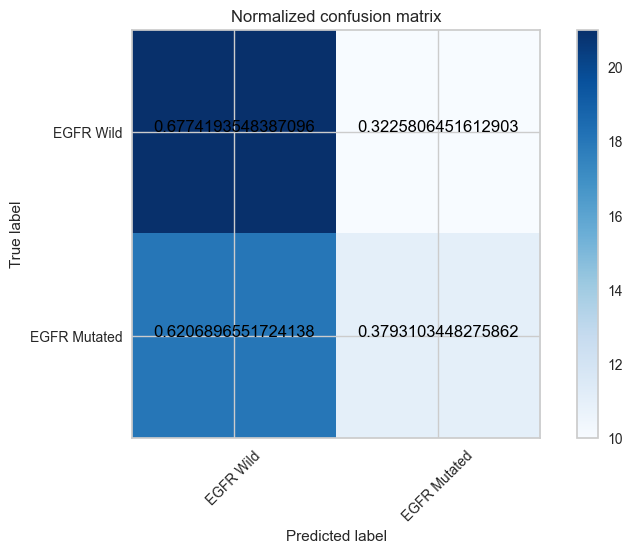

In [72]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.51      0.61      0.56        31
EGFR Mutated       0.48      0.38      0.42        29

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.49        60
weighted avg       0.50      0.50      0.49        60

precision 0.4782608695652174 accuracy 0.5 recall 0.3793103448275862 auc 0.528364849833148


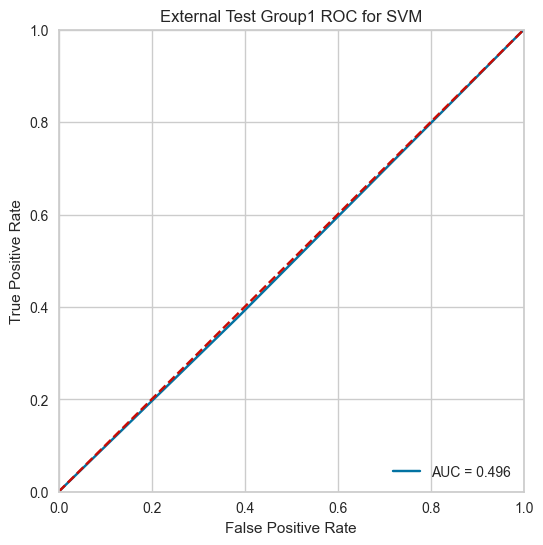

In [74]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[19 12]
 [18 11]]
Normalized confusion matrix
[[0.61 0.39]
 [0.62 0.38]]


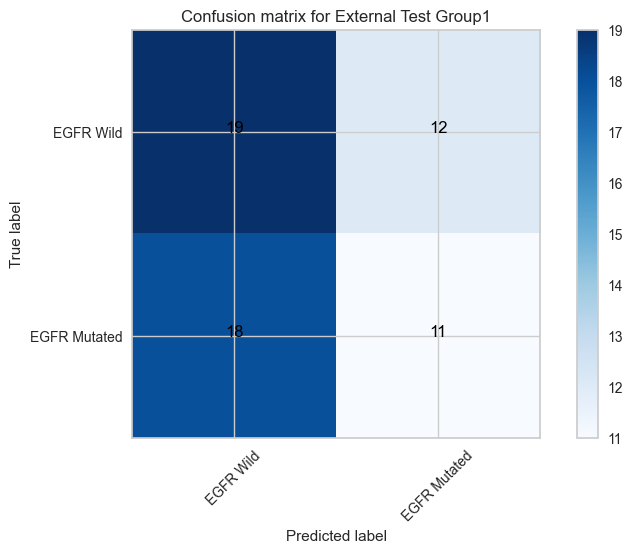

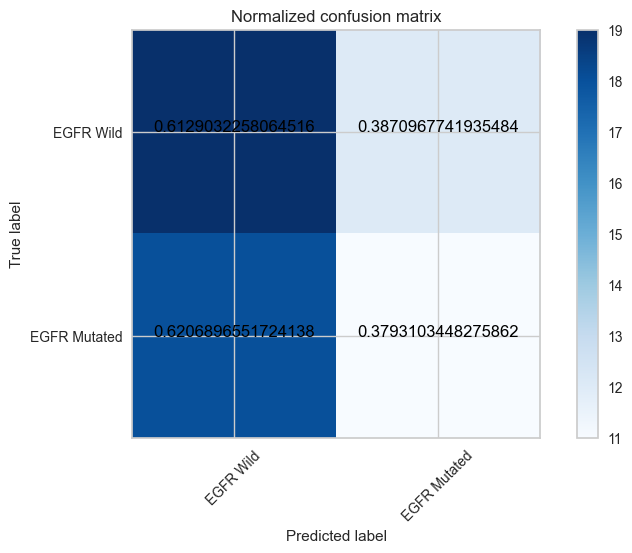

In [75]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [76]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/KNN191/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-KNN191-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.54      0.68      0.60        31
EGFR Mutated       0.52      0.38      0.44        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.52        60
weighted avg       0.53      0.53      0.52        60

precision 0.5238095238095238 accuracy 0.5333333333333333 recall 0.3793103448275862 auc 0.528364849833148


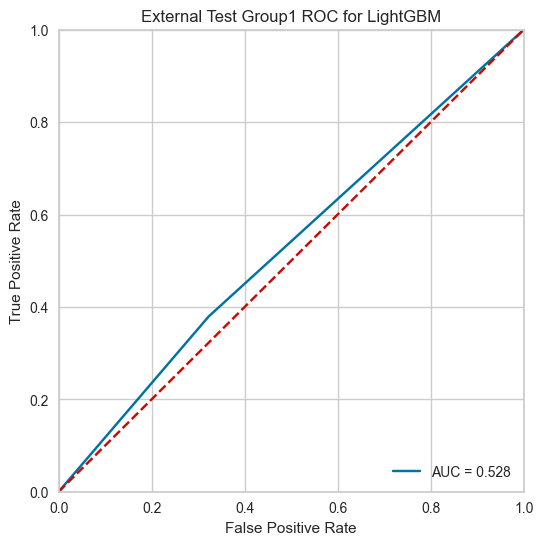

In [77]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[21 10]
 [18 11]]
Normalized confusion matrix
[[0.68 0.32]
 [0.62 0.38]]


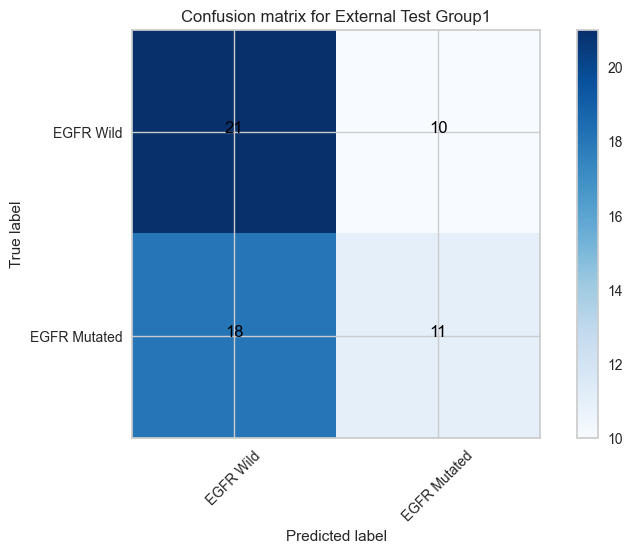

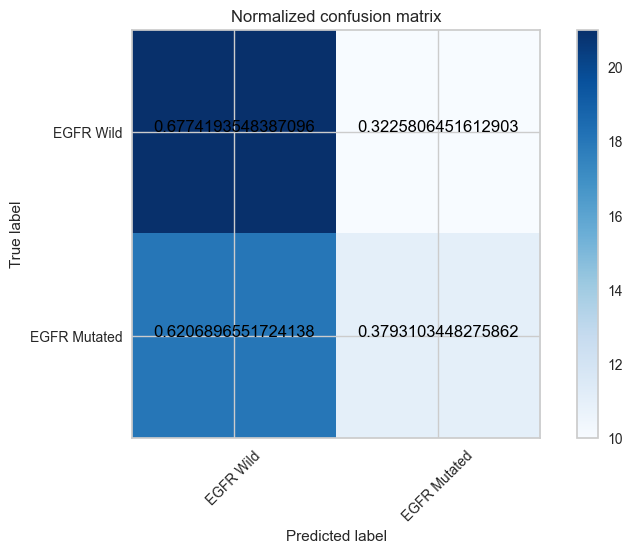

In [78]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()